## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
complete_data_df = pd.merge(mouse_metadata, study_results, how="left", on=["Mouse ID"])

# Display the data table for preview
# print(mouse_metadata)
# print(study_results)
complete_data_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.
number_of_mice = complete_data_df["Mouse ID"].nunique()
print(f"There are {number_of_mice} mice in the study.")

There are 249 mice in the study.


In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

duplicate_id = complete_data_df.loc[complete_data_df.duplicated(subset=['Mouse ID','Timepoint']),'Mouse ID'].unique()
duplicate_id

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_info = complete_data_df[complete_data_df["Mouse ID"] == "g989"]
duplicate_info

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
clean_df = complete_data_df[complete_data_df['Mouse ID'].isin(['g989']) == False]
clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# # Create a clean DataFrame by dropping the duplicate mouse by its ID.
# clean_df = complete_data_df.drop_duplicates(subset=["Mouse ID","Timepoint"])
# clean_df

In [7]:
# Checking the number of mice in the clean DataFrame.
new_number_of_mice = clean_df["Mouse ID"].nunique()
print(f"There are {new_number_of_mice} mice in the clean data.")

There are 248 mice in the clean data.


## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

mean = clean_df.groupby(["Drug Regimen"]).mean()["Tumor Volume (mm3)"]
# print(mean)

median = clean_df.groupby(["Drug Regimen"]).median()["Tumor Volume (mm3)"]
# print(median)

variance = clean_df.groupby(["Drug Regimen"]).var()["Tumor Volume (mm3)"]
# print(variance)

standard_dev = clean_df.groupby(["Drug Regimen"]).std()["Tumor Volume (mm3)"]
# print(standard_dev)

SEM = clean_df.groupby(["Drug Regimen"]).sem()["Tumor Volume (mm3)"]
# print(SEM)

# This method is the most straighforward, creating multiple series and putting them all together at the end.
summary_stats = {
    "Mean of Tumor Volume": mean,
    "Median of Tumor Volume": median,
    "Variance of Tumor Volume": variance,
    "Standard Deviation of Tumor Volume": standard_dev,
    "SEM of Tumor Volume": SEM,
    
}

pd.DataFrame(summary_stats)

,Mean of Tumor Volume,Median of Tumor Volume,Variance of Tumor Volume,Standard Deviation of Tumor Volume,SEM of Tumor Volume
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# # Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

summary_by_group = clean_df.groupby(["Drug Regimen"]).count()
st.zscore(summary_by_group["Tumor Volume (mm3)"])

# # This method produces everything in a single groupby function


array([ 1.8240193 , -0.43429031, -0.43429031,  0.        , -0.08685806,
       -0.30400322, -1.73716124,  1.73716124, -0.30400322, -0.26057419])

## Bar and Pie Charts

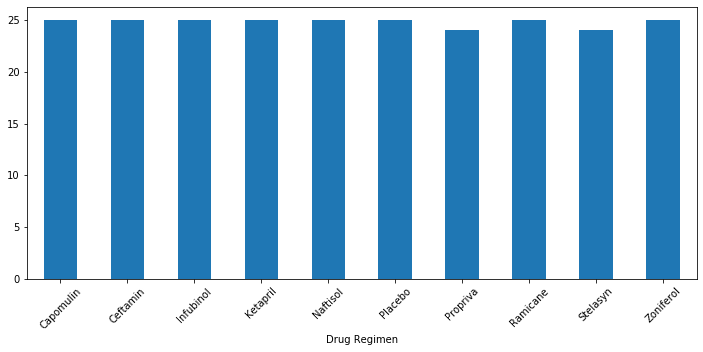

In [10]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas.
drug_and_mice = clean_df.groupby(["Drug Regimen","Mouse ID"]).count().reset_index()

mice_in_treatment = drug_and_mice.groupby(["Drug Regimen"]).count()["Mouse ID"]
mice_in_treatment.plot.bar(rot=45, figsize=(12,5))


In [11]:
mice_in_treatment

Drug Regimen
Capomulin    25
Ceftamin     25
Infubinol    25
Ketapril     25
Naftisol     25
Placebo      25
Propriva     24
Ramicane     25
Stelasyn     24
Zoniferol    25
Name: Mouse ID, dtype: int64

([<matplotlib.axis.XTick at 0x1e70b181dc8>,
 <a list of 10 Text xticklabel objects>)

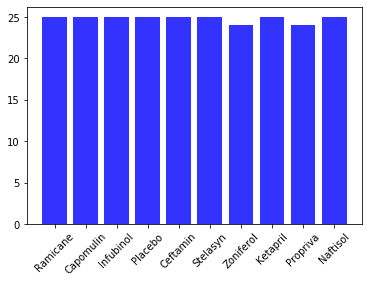

In [12]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
x_axis = np.arange(len(drug_and_mice.groupby(["Drug Regimen"]).count()["Mouse ID"]))
tick_locations = [value for value in x_axis]
count = drug_and_mice.groupby(["Drug Regimen"]).count()["Mouse ID"]
        
plt.bar(x_axis, count, color='b', alpha=.8, align="center")
plt.xticks(tick_locations, clean_df["Drug Regimen"].unique(), rotation=45)

In [13]:
x_axis

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

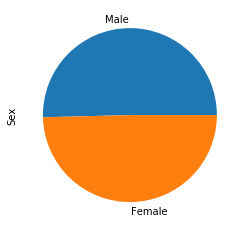

In [14]:
# # Generate a pie plot showing the distribution of female versus male mice using pandas
reset_index = clean_df.groupby(["Sex","Mouse ID"]).count()
sex_of_mice = reset_index.reset_index().drop(columns=["Drug Regimen", "Age_months", "Weight (g)","Timepoint", "Tumor Volume (mm3)","Metastatic Sites"])

sex_of_mice = sex_of_mice.set_index(["Mouse ID"])
sex_of_mice["Sex"].value_counts().plot.pie()


In [15]:
sex_of_mice.count()

Sex    248
dtype: int64

([<matplotlib.patches.Wedge at 0x1e70b10a7c8>,
 [Text(0.013934097579310996, -1.0999117423341975, 'Male'),
  Text(-0.013934097579310861, 1.0999117423341975, 'Female')])

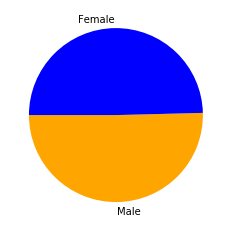

In [16]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
size = sex_of_mice["Sex"].value_counts()

labels = size.index
colors = ["orange", "blue"]
        

plt.pie(size, labels=labels, colors=colors, startangle=180)




## Quartiles, Outliers and Boxplots

In [17]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
drug_types = clean_df[(clean_df["Drug Regimen"] == "Capomulin")|(clean_df["Drug Regimen"] == "Ramicane")|(clean_df["Drug Regimen"] == "Infubinol")|(clean_df["Drug Regimen"] == "Ceftamin")]
drug_types



# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
max_df = drug_types.groupby(["Mouse ID"]).max()["Timepoint"] 

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
max_time = pd.merge(max_df, drug_types, how="left", on=["Mouse ID", "Timepoint"])

#max_df


In [18]:
# drug_types

In [19]:
# max_df 

In [20]:
max_time

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a275,45,Ceftamin,Female,20,28,62.999356,3
3,a411,45,Ramicane,Male,3,22,38.407618,1
4,a444,45,Ramicane,Female,10,25,43.047543,0
...,...,...,...,...,...,...,...,...
95,y769,45,Ceftamin,Female,6,27,68.594745,4
96,y793,45,Capomulin,Male,17,17,31.896238,2
97,y865,45,Ceftamin,Male,23,26,64.729837,3
98,z578,45,Ramicane,Male,11,16,30.638696,0


In [21]:
# max_Infubinol = max_time[max_time["Drug Regimen"] == "Infubinol"]
# max_Infubinol

In [22]:
# quartiles = max_Infubinol["Tumor Volume (mm3)"].quantile([.25,.5,.75])
# lowerq = quartiles[0.25]
# upperq = quartiles[0.75]
# iqr = upperq-lowerq

# lower_bound = lowerq - (1.5*iqr)
# upper_bound = upperq + (1.5*iqr)
# print(f"Values below {lower_bound} could be outliers.")
# print(f"Values above {upper_bound} could be outliers.")

# print(max_Infubinol[(max_Infubinol["Tumor Volume (mm3)"]<lower_bound) | (max_Infubinol["Tumor Volume (mm3)"]>upper_bound)])

In [23]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
 # Locate the rows which contain mice on each drug and get the tumor volumes
    # add subset 
    # Determine outliers using upper and lower bounds
    
for treatment in treatments:
    max_drug = max_time[max_time["Drug Regimen"] == treatment]

    quartiles = max_drug["Tumor Volume (mm3)"].quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq

    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(lower_bound)
    print(upper_bound)
    tumor_vol.append(max_drug["Tumor Volume (mm3)"])
    
    print(f"Outlier for {treatment}:")
    if len(max_drug[(max_drug["Tumor Volume (mm3)"]<lower_bound) | (max_drug["Tumor Volume (mm3)"]>upper_bound)]["Tumor Volume (mm3)"]) == 0:
        print("No outliers")
    else:
        print(max_drug[(max_drug["Tumor Volume (mm3)"]<lower_bound) | (max_drug["Tumor Volume (mm3)"]>upper_bound)]["Tumor Volume (mm3)"])
   
    

20.70456164999999
51.83201549
Outlier for Capomulin:
No outliers
17.912664470000003
54.30681135
Outlier for Ramicane:
No outliers
36.83290494999999
82.74144559000001
Outlier for Infubinol:
15    36.321346
Name: Tumor Volume (mm3), dtype: float64
25.355449580000002
87.66645829999999
Outlier for Ceftamin:
No outliers


In [24]:
tumor_vol

[9     38.982878
 12    38.939633
 24    30.485985
 25    37.074024
 26    40.159220
 32    47.685963
 33    37.311846
 34    38.125164
 35    38.753265
 45    41.483008
 49    38.846876
 51    28.430964
 53    33.329098
 64    46.539206
 65    32.377357
 68    41.581521
 70    23.343598
 72    40.728578
 73    34.455298
 78    31.023923
 82    40.658124
 83    39.952347
 88    36.041047
 90    28.484033
 96    31.896238
 Name: Tumor Volume (mm3), dtype: float64,
 3     38.407618
 4     43.047543
 5     38.810366
 7     32.978522
 16    38.342008
 17    33.397653
 19    37.311236
 21    40.659006
 27    29.128472
 29    33.562402
 30    36.374510
 37    31.560470
 38    36.134852
 40    22.050126
 50    30.564625
 54    31.095335
 62    45.220869
 63    36.561652
 66    37.225650
 67    43.419381
 71    30.276232
 77    40.667713
 87    43.166373
 94    44.183451
 98    30.638696
 Name: Tumor Volume (mm3), dtype: float64,
 0     67.973419
 1     65.525743
 6     57.031862
 8     66.083

{'whiskers': [<matplotlib.lines.Line2D at 0x1e70b1b4988>,
 'caps': [<matplotlib.lines.Line2D at 0x1e70b1b4ec8>,
 'boxes': [<matplotlib.lines.Line2D at 0x1e70b1b4188>,
 'medians': [<matplotlib.lines.Line2D at 0x1e70b1bac88>,
 'fliers': [<matplotlib.lines.Line2D at 0x1e70b1c0848>,
 'means': []}

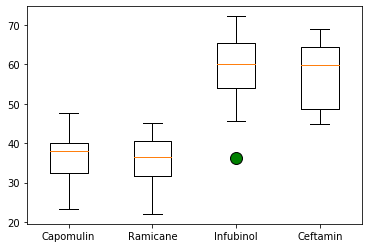

In [25]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
plt.boxplot(tumor_vol, labels = treatments,flierprops={'markerfacecolor':'green', 'marker':'o','markersize':12})



In [26]:
clean_df[(clean_df["Drug Regimen"] == "Capomulin") &(clean_df["Mouse ID"] == "s185")]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
15,s185,Capomulin,Female,3,17,25,33.949940,0
16,s185,Capomulin,Female,3,17,30,32.959671,1
17,s185,Capomulin,Female,3,17,35,28.328531,1
18,s185,Capomulin,Female,3,17,40,25.472143,1
19,s185,Capomulin,Female,3,17,45,23.343598,1


## Line and Scatter Plots

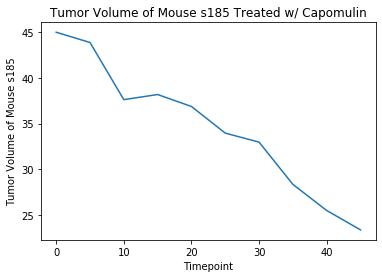

In [27]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
mouse_in_Capomulin = clean_df[(clean_df["Drug Regimen"] == "Capomulin") &(clean_df["Mouse ID"] == "s185")]

x_axis = mouse_in_Capomulin["Timepoint"]
y_axis = mouse_in_Capomulin["Tumor Volume (mm3)"]

plt.plot(x_axis, y_axis)
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume of Mouse s185")
plt.title("Tumor Volume of Mouse s185 Treated w/ Capomulin")
plt.show()

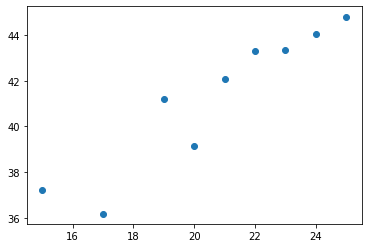

In [28]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
Capomulin_df = clean_df[(clean_df["Drug Regimen"] == "Capomulin")]
# x_axis = Capomulin_df.groupby(["Mouse ID"]).mean()["Weight (g)"]
# y_axis = Capomulin_df.groupby(["Mouse ID"]).mean()["Tumor Volume (mm3)"]

x_axis = Capomulin_df["Weight (g)"].unique()
y_axis = Capomulin_df.groupby(["Weight (g)"]).mean()["Tumor Volume (mm3)"]

plt.scatter(x_axis, y_axis)

In [29]:
Capomulin_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
...,...,...,...,...,...,...,...,...
440,i557,Capomulin,Female,1,24,45,47.685963,1
1452,r157,Capomulin,Male,22,25,0,45.000000,0
1453,r157,Capomulin,Male,22,25,5,45.597064,0
1454,r157,Capomulin,Male,22,25,10,46.059608,0


## Correlation and Regression

In [30]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
correlation = st.pearsonr(x_axis, y_axis)
correlation

(0.9342132083005745, 0.00022537876816495705)

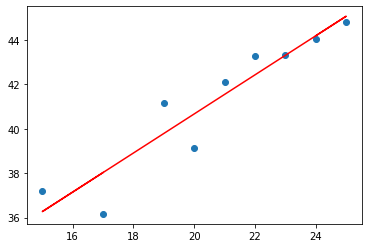

In [31]:
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis,y_axis)
plt.plot(x_axis,regress_values,"r-")